# Mayer vs Johnston Comparison

In this notebook we analyze the proteins in the Johnston and Mayer papers. First, we extract their total and differential proteins. We also sort the differential proteins into those that are upregulated and those that are downregulated. After we extract their data, we make a venn diagram comparing their differential proteins, and another venn diagram comparing their total proteins. We then plot the p-values of the significant proteins in each paper against each other.

In [1]:
johnston_file = "data/134638_0_supp_38937_p0y7zb.xlsx"
mayer_file = "data/133399_0_supp_15943_4ybsvb.xlsx"

In [2]:
import pandas as pd
import requests
import os.path
import os
from os import path
from numpy import log10
from gprofiler import GProfiler
import longitudinalCLL
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Mayer Paper

Dowload and import supplementary table 3, use after imputation sheets (Mayer et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5795392/bin/supp_RA117.000425_133399_0_supp_15943_4ybsvb.xlsx

I parse the dataframe and extract all the names of identified proteins and differential (+ in t-test column).
The differential and total proteins identified will be used to generate venn diagrams.
There are 6,945 total proteins identified in the paper and 795 differential proteins.

Since this paper differentiated between nuclear and cytoplasmic, we have to read in 2 files. First, we pull the nuclear file and extract the significant, upregulated, and downregulated proteins.

In [3]:
ne_sheet_name = "NE_after imputation"
#The other is "NE_before imputation"
m_ne_df = pd.read_excel(mayer_file, sheet_name = ne_sheet_name)

In [4]:
m_sig_ne = m_ne_df.loc[m_ne_df['Student\'s t-test Significant CLL vs elderly Bcells'] == '+']

Next, we pull the cytoplasmic file and extract the significant, upregulated, and downregulated proteins.

In [5]:
mayer_cyt_sheet_name = "CYT_after imputation"
m_cyt_df = pd.read_excel(mayer_file, sheet_name= mayer_cyt_sheet_name,
                         skiprows = 1) #There is a header saying sup. table s3

In [6]:
m_sig_cyt = m_cyt_df.loc[m_cyt_df['Student\'s t-test Significant CLL vs elderly B cells'] == '+']

In [7]:
m_diff = []

In [8]:
sig_frames = [m_sig_ne, m_sig_cyt]
sig = pd.concat(sig_frames)

In [9]:
for protein in sig['Protein IDs'] :
    temp = protein.split(";")
    m_diff.append(temp[0])

The following cells extract all the proteins identified

In [10]:
m_tot = []

In [11]:
frames = [m_ne_df, m_cyt_df]
m_t = pd.concat(frames)

In [12]:
m_t.dropna(subset = ['Protein IDs'], inplace = True)

In [13]:
for protein in m_t['Protein IDs']:
    temp = protein.split(";")
    m_tot.append(temp[0])

Save to a file

In [14]:
#m_diff.to_csv('data/m_diff.csv')
#m_tot.to_csv('data/m_tot.csv')

## Johnston Paper
Download and import supplementary table 2 (Johnston et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5880099/bin/supp_RA117.000539_134638_0_supp_38937_p0y7zb.xlsx

I parse the dataframe and extract all the names of identified proteins, all the proteins labeled as significantly upregulated (>0.3) and downregulated (<-0.3), and differential.
The differential and total proteins identified will be used to generate venn diagrams.
There are 5,956 total proteins identified in the paper and 1137 differential proteins

In [15]:
j_sheet_name = "CLL proteome"
j_df = pd.read_excel(johnston_file, sheet_name = j_sheet_name)

Here I extract all the proteins with a differential regulation score (>0.3 and <-0.3). I sort them into upregulated and downregulated as well as add them to the differential. I also extract the names of all proteins identified.

In [16]:
j_u = j_df.loc[j_df['Regulation score'] >= 0.3]
j_upreg = j_u['Protein group accession']

In [17]:
j_d = j_df.loc[j_df['Regulation score'] <= -0.3]
j_downreg = j_d['Protein group accession']

In [18]:
diff_frames = [j_downreg, j_upreg]
j_diff = pd.concat(diff_frames)

In [19]:
j_tot = j_df['Protein group accession']

Save to a file

In [20]:
#j_diff.to_csv('data/j_diff.csv')
#j_tot.to_csv('data/j_tot.csv')

## Overlap

Here I make venn diagrams looking at the overlaps between the papers

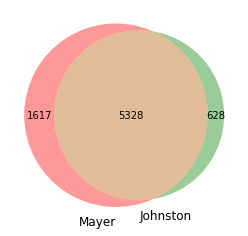

In [21]:
venn2(subsets = (set(m_tot), set(j_tot)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/fig_2a.png', bbox_inches='tight', dpi=300)
plt.show()

This venn diagram shows the overlap for the total proteins in Mayer and Johnston.

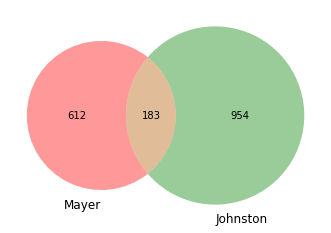

In [22]:
venn2(subsets = (set(m_diff), set(j_diff)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/fjg_2b.png', bbox_inches='tight', dpi=300)
plt.show()

This venn diagram shows the overlap between differential proteins of Mayer and Johnston

## P-value plot
Here I use the p-values to plot the proteins of Mayer and Johnston against each other

In [23]:
j_p = j_df[['Protein group accession', "-Log10(p value)"]]
j_p.set_index('Protein group accession')

,-Log10(p value)
Protein group accession,
Q07065,7.749376
Q9NQY0,7.778704
P01833,4.903921
Q6K0P9,6.030706
O94921,7.838829
...,...
Q16799,5.895298
A2RUS2,8.119950
Q12797,7.515437


In [24]:
#mayer_p = m_ne_df[['Protein IDs', "Student's t-test p-value CLL vs  elderly B cells"]]
mayer_p = pd.concat([m_ne_df[['Protein IDs', "Student's t-test p-value CLL vs  elderly B cells"]], m_cyt_df[['Protein IDs', "Student's t-test p-value CLL vs  elderly B cells"]]]).groupby(['Protein IDs'], as_index=False)["Student's t-test p-value CLL vs  elderly B cells"].min()
mayer_p.set_index('Protein IDs')

,Student's t-test p-value CLL vs elderly B cells
Protein IDs,
A0AV96,0.029701
A0AVT1,0.353243
A0FGR8,0.047417
A0JLT2,0.217343
A0JNW5,0.238297
...,...
Q9Y6X5,0.804612
Q9Y6X8;Q9H4I2,0.264898
Q9Y6X9,0.426665


In [25]:
mj_intersection = set(mayer_p['Protein IDs']).intersection(set(j_p['Protein group accession']))

In [26]:
significant_in_either = mj_intersection.intersection(set(m_diff)).union(
    mj_intersection.intersection(set(j_diff)))

In [27]:
df_mj_pvals_sig_in_either = pd.DataFrame(index = list(significant_in_either), columns = 
                           ['Mayer et al. -log10(p)', 'Johnston et al. -log10(p)'])

for i in significant_in_either:
    val = float(mayer_p[mayer_p['Protein IDs']==i]["Student's t-test p-value CLL vs  elderly B cells"])
    df_mj_pvals_sig_in_either.loc[i, 'Mayer et al. -log10(p)'] = -log10(val)#since this is p and the other is -log(p)
    
    valj = float(j_p[j_p['Protein group accession']==i]["-Log10(p value)"])
    df_mj_pvals_sig_in_either.loc[i,'Johnston et al. -log10(p)'] = valj

In [28]:
df_mj_pvals_sig_in_either

,Mayer et al. -log10(p),Johnston et al. -log10(p)
P12270,3.05784,4.9241
Q16630,3.67489,6.65031
Q6P587,0.991638,6.34752
Q86UT6,1.35902,2.568
Q13094,0.758192,4.93872
...,...,...
P35749,0.526221,2.21392
O60568,4.17004,0.121455
O14949,2.69344,0.598819
O60443,0.336366,3.58654


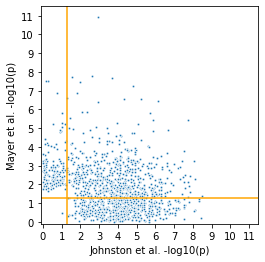

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
sns.scatterplot(data=df_mj_pvals_sig_in_either, x='Johnston et al. -log10(p)', y='Mayer et al. -log10(p)', s=7)
 
# control x and y limits
plt.ylim(-0.1, 11.5)
plt.xlim(-0.1, 11.5)
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.rc('axes',labelsize=16)
#plt.savefig('data/fig_2c.png',dpi=300)

In [30]:
stats.pearsonr(df_mj_pvals_sig_in_either['Johnston et al. -log10(p)'], df_mj_pvals_sig_in_either['Mayer et al. -log10(p)'])

(-0.27285606383434885, 2.8503609010544714e-23)